# Data Preprocessing 

In [64]:
import time
start_time = time.time()

In [65]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_squared_log_error

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [66]:
df1 = pd.read_excel('D:\Academic\Research\PCF Models\ML_PCF by SUNNY CHUGH\pcf_modeSoln_data_1.xlsx', sheet_name='SiO2-air-rings-4-dBYp-0.7')
df2 = pd.read_excel('D:\Academic\Research\PCF Models\ML_PCF by SUNNY CHUGH\pcf_modeSoln_data_1.xlsx', sheet_name='SiO2-air-rings-4-dBYp-0.8')
df3 = pd.read_excel('D:\Academic\Research\PCF Models\ML_PCF by SUNNY CHUGH\pcf_modeSoln_data_1.xlsx', sheet_name='SiO2-air-rings-4-dBYp-0.9')
df4 = pd.read_excel('D:\Academic\Research\PCF Models\ML_PCF by SUNNY CHUGH\pcf_modeSoln_data_1.xlsx', sheet_name='SiO2-air-rings-4-dBYp-0.6')
df5 = pd.read_excel('D:\Academic\Research\PCF Models\ML_PCF by SUNNY CHUGH\pcf_modeSoln_data_1.xlsx', sheet_name='SiO2-air-rings-5-dBYp-0.7')
df6 = pd.read_excel('D:\Academic\Research\PCF Models\ML_PCF by SUNNY CHUGH\pcf_modeSoln_data_1.xlsx', sheet_name='SiO2-air-rings-5-dBYp-0.8')
df7 = pd.read_excel('D:\Academic\Research\PCF Models\ML_PCF by SUNNY CHUGH\pcf_modeSoln_data_1.xlsx', sheet_name='SiO2-air-rings-5-dBYp-0.9')
df8 = pd.read_excel('D:\Academic\Research\PCF Models\ML_PCF by SUNNY CHUGH\pcf_modeSoln_data_1.xlsx', sheet_name='SiO2-air-rings-5-dBYp-0.6')

In [67]:
combined_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8]).drop_duplicates().reset_index(drop=True)

In [68]:
combined_df.tail()

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-\nrings,diaBYpitch,pitch\n(um),wl\n(um),neff,Aeff\n(um^2),dispersion\n(ps/km.nm),conf-loss\n(dB/cm),conf-loss-in-log10\n(dB/cm),confinement-loss\n(dB/cm)
1113,1.444,1,5,0.6,2.0,0.589655,1.46354,4.06947,59.7801,9.104810e-16,-15.040729,NaN
1114,1.444,1,5,0.6,2.0,0.564356,1.46406,4.04679,58.0553,5.573740e-16,-15.253853,NaN
1115,1.444,1,5,0.6,2.0,0.541139,1.46453,4.02620,56.4114,3.539720e-16,-15.451031,NaN
1116,1.444,1,5,0.6,2.0,0.519757,1.46495,4.00741,54.8488,2.322280e-16,-15.634085,NaN
1117,1.444,1,5,0.6,2.0,0.500000,1.46532,3.99021,53.3584,1.568350e-16,-15.804557,NaN


In [69]:
combined_df.shape

(1118, 12)

In [70]:
for column in combined_df.columns:
    print(column,':',combined_df[column].unique())

core-ref-index-at-wl-1.55um : [1.444]
clad-ref-index : [1]
no-of-
rings : [4 5]
diaBYpitch : [0.7 0.8 0.9 0.6]
pitch
(um) : [0.8 1.  1.2 1.4 1.6 1.8 2. ]
wl
(um) : [1.8      1.58333  1.41322  1.27612  1.16327  1.06875  0.988439 0.919355
 0.859296 0.806604 0.76     0.718487 0.681275 0.647727 0.617329 0.589655
 0.564356 0.541139 0.519757 0.5     ]
neff : [1.27828 1.29633 1.31463 1.33194 1.34753 1.36118 1.373   1.38318 1.39194
 1.39951 1.40608 1.41179 1.41679 1.42118 1.42506 1.4285  1.43156 1.43431
 1.43676 1.43898 1.31138 1.33312 1.35214 1.36818 1.3815  1.39256 1.40176
 1.40948 1.41598 1.42152 1.42626 1.43034 1.43388 1.43698 1.43969 1.44209
 1.44422 1.44611 1.4478  1.44932 1.34215 1.36298 1.37972 1.3931  1.40385
 1.41256 1.4197  1.4256  1.43053 1.4347  1.43824 1.44128 1.44391 1.4462
 1.44819 1.44995 1.45151 1.45289 1.45413 1.45523 1.36691 1.38519 1.39929
 1.41026 1.41892 1.42586 1.43149 1.43612 1.43997 1.4432  1.44594 1.44829
 1.45031 1.45206 1.45359 1.45494 1.45612 1.45718 1.45812 1.458

**core-ref-index-at-wl-1.55um : [1.444]
clad-ref-index : [1]
have same value for all rows... no change in value.**

In [71]:
data=combined_df

In [72]:
data.columns

Index(['core-ref-index-at-wl-1.55um', 'clad-ref-index', 'no-of-\nrings',
       'diaBYpitch', 'pitch\n(um)', 'wl\n(um)', 'neff', 'Aeff\n(um^2)',
       'dispersion\n(ps/km.nm)', 'conf-loss\n(dB/cm)',
       'conf-loss-in-log10\n(dB/cm)', 'confinement-loss\n(dB/cm)'],
      dtype='object')

In [73]:
data.shape

(1118, 12)

In [74]:
data.loc[data.duplicated(), :]

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-\nrings,diaBYpitch,pitch\n(um),wl\n(um),neff,Aeff\n(um^2),dispersion\n(ps/km.nm),conf-loss\n(dB/cm),conf-loss-in-log10\n(dB/cm),confinement-loss\n(dB/cm)


In [75]:
data.isnull().sum().sum()

1118

In [76]:
data.isnull().sum()

core-ref-index-at-wl-1.55um      0
clad-ref-index                   0
no-of-\nrings                    0
diaBYpitch                       0
pitch\n(um)                      0
wl\n(um)                         0
neff                             0
Aeff\n(um^2)                     0
dispersion\n(ps/km.nm)           0
conf-loss\n(dB/cm)             280
conf-loss-in-log10\n(dB/cm)      0
confinement-loss\n(dB/cm)      838
dtype: int64

In [77]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

core-ref-index-at-wl-1.55um    float64
clad-ref-index                   int64
no-of-\nrings                    int64
diaBYpitch                     float64
pitch\n(um)                    float64
wl\n(um)                       float64
neff                           float64
Aeff\n(um^2)                   float64
dispersion\n(ps/km.nm)         float64
conf-loss\n(dB/cm)             float64
conf-loss-in-log10\n(dB/cm)    float64
confinement-loss\n(dB/cm)      float64
dtype: object

In [78]:
#Null value filling with mean
for col in numeric_features:
    data[col].fillna(data[col].mean(), inplace=True)

In [79]:
data.isnull().sum().sum()

0

# Scalling

In [80]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
scaler1 = MinMaxScaler()  
scaler2 = MinMaxScaler()  


**core-ref-index-at-wl-1.55um : [1.444] clad-ref-index : [1] have same value for all rows... no change in value. So ignored tohe two colums.**

In [81]:
out_var_datafile_1 = data[['neff']]
#datafile_1=data[['no-of-\nrings', 'diaBYpitch', 'pitch\n(um)', 'wl\n(um)']]

scaler1.fit(data)
scaler2.fit(out_var_datafile_1)

scaler_datafile_1 = scaler1.transform(data)
scaler_out_datafile_1 = scaler2.transform(out_var_datafile_1)

scaler_datafile=DataFrame(scaler_datafile_1,  columns = data.columns)
X=scaler_datafile[['no-of-\nrings', 'diaBYpitch', 'pitch\n(um)', 'wl\n(um)']]
Y=DataFrame(scaler_out_datafile_1,  columns = out_var_datafile_1.columns)

print(X)
print()
print(Y)

      no-of-\nrings  diaBYpitch  pitch\n(um)  wl\n(um)
0               0.0    0.333333          0.0  1.000000
1               0.0    0.333333          0.0  0.833331
2               0.0    0.333333          0.0  0.702477
3               0.0    0.333333          0.0  0.597015
4               0.0    0.333333          0.0  0.510208
...             ...         ...          ...       ...
1113            1.0    0.000000          1.0  0.068965
1114            1.0    0.000000          1.0  0.049505
1115            1.0    0.000000          1.0  0.031645
1116            1.0    0.000000          1.0  0.015198
1117            1.0    0.000000          1.0  0.000000

[1118 rows x 4 columns]

          neff
0     0.355190
1     0.417416
2     0.480505
3     0.540180
4     0.593926
...        ...
1113  0.993864
1114  0.995656
1115  0.997277
1116  0.998724
1117  1.000000

[1118 rows x 1 columns]


#data for validation with actual data#

In [82]:
X_validate=X[20:40]
X_validate.shape

(20, 4)

In [83]:
X=X.drop(labels=range(20, 40), axis=0)

In [84]:
X.shape


(1098, 4)

In [85]:
X.head()

,no-of-\nrings,diaBYpitch,pitch\n(um),wl\n(um)
0,0.0,0.333333,0.0,1.000000
1,0.0,0.333333,0.0,0.833331
2,0.0,0.333333,0.0,0.702477
3,0.0,0.333333,0.0,0.597015
4,0.0,0.333333,0.0,0.510208


In [86]:
Y_validate=Y[20:40]
Y_validate.shape

(20, 1)

In [87]:
Y=Y.drop(labels=range(20, 40), axis=0)

In [88]:
Y.shape

(1098, 1)

In [89]:
Y.head()

,neff
0,0.355190
1,0.417416
2,0.480505
3,0.540180
4,0.593926


In [90]:
#from sklearn.model_selection import train_test_split
#x=data[['no-of-\nrings','diaBYpitch','pitch\n(um)','wl\n(um)','Aeff\n(um^2)','conf-loss\n(dB/cm)']]
#x=data.drop(columns=['conf-loss\n(dB/cm)','dispersion\n(ps/km.nm)','conf-loss-in-log10\n(dB/cm)','conf-loss\n(dB/cm)'],axis=1)
#y=data['neff']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [91]:
y_train

,neff
473,0.952494
112,0.973627
726,0.768435
750,0.898576
1085,0.953391
...,...
486,0.917330
141,0.275244
1064,0.927535
1115,0.997277


In [92]:
y_test

,neff
64,0.840039
590,0.879408
76,0.968284
622,0.810184
850,0.731237
...,...
888,0.843658
401,0.786603
832,0.978557
487,0.928500


In [93]:
x_train

,no-of-\nrings,diaBYpitch,pitch\n(um),wl\n(um)
473,0.0,0.000000,0.333333,0.090253
112,0.0,0.333333,0.833333,0.139442
726,1.0,0.666667,0.166667,0.322581
750,1.0,0.666667,0.333333,0.168067
1085,1.0,0.000000,0.833333,0.322581
...,...,...,...,...
486,0.0,0.000000,0.500000,0.322581
141,0.0,0.666667,0.000000,0.833331
1064,1.0,0.000000,0.666667,0.375722
1115,1.0,0.000000,1.000000,0.031645


In [94]:
x_test

,no-of-\nrings,diaBYpitch,pitch\n(um),wl\n(um)
64,0.0,0.333333,0.500000,0.510208
590,1.0,0.333333,0.166667,0.168067
76,0.0,0.333333,0.500000,0.049505
622,1.0,0.333333,0.500000,0.597015
850,1.0,1.000000,0.000000,0.168067
...,...,...,...,...
888,1.0,1.000000,0.333333,0.235849
401,0.0,1.000000,1.000000,0.833331
832,1.0,0.666667,1.000000,0.113636
487,0.0,0.000000,0.500000,0.276382


# **RandomForestRegressor**

In [95]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(x_train, y_train)

y_train_pred = modelRF.predict(x_train)
y_test_pred = modelRF.predict(x_test)
#x_train_pred=x_train_pred.reshape(-1,1)
#x_test_pred=x_test_pred.reshape(-1,1)

RF_train_MSE=mean_squared_error(y_train,y_train_pred)
RF_test_MSE=mean_squared_error(y_test,y_test_pred)
RF_train_r2=r2_score(y_train,y_train_pred)
RF_test_r2=r2_score(y_test,y_test_pred)

print('MSE train data: %.7f, MSE test data: %.7f' % (RF_train_MSE,RF_test_MSE))
print('R2 train data: %.7f, R2 test data: %.7f' % (RF_train_r2,RF_test_r2))

MSE train data: 0.0000305, MSE test data: 0.0001571
R2 train data: 0.9987157, R2 test data: 0.9921960


# **GradientBoostingRegressor**

In [96]:
modelGB = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4)
modelGB.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=200)

In [97]:
y_train_pred = modelGB.predict(x_train)
y_test_pred = modelGB.predict(x_test)
#x_train_pred=x_train_pred.reshape(-1,1)
#x_test_pred=x_test_pred.reshape(-1,1)

GB_train_MSE=mean_squared_error(y_train,y_train_pred)
GB_test_MSE=mean_squared_error(y_test,y_test_pred)
GB_train_r2=r2_score(y_train,y_train_pred)
GB_test_r2=r2_score(y_test,y_test_pred)

print('MSE train data: %.7f, MSE test data: %.7f' % (GB_train_MSE,GB_test_MSE))
print('R2 train data: %.7f, R2 test data: %.7f' % (GB_train_r2,GB_test_r2))

MSE train data: 0.0000058, MSE test data: 0.0000246
R2 train data: 0.9997536, R2 test data: 0.9987771


# **DecisionTreeRegressor**

In [98]:
modelDT = DecisionTreeRegressor(random_state=42)
modelDT.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [99]:
y_train_pred = modelDT.predict(x_train)
y_test_pred = modelDT.predict(x_test)
#x_train_pred=x_train_pred.reshape(-1,1)
#x_test_pred=x_test_pred.reshape(-1,1)

DT_train_MSE=mean_squared_error(y_train,y_train_pred)
DT_test_MSE=mean_squared_error(y_test,y_test_pred)
DT_train_r2=r2_score(y_train,y_train_pred)
DT_test_r2=r2_score(y_test,y_test_pred)

print('MSE train data: %.7f, MSE test data: %.7f' % (DT_train_MSE,DT_test_MSE))
print('R2 train data: %.7f, R2 test data: %.7f' % (DT_train_r2,DT_test_r2))

MSE train data: 0.0000000, MSE test data: 0.0003047
R2 train data: 1.0000000, R2 test data: 0.9848659


In [100]:
train_error=[RF_train_MSE,GB_train_MSE,DT_train_MSE]
test_error=[RF_test_MSE,GB_test_MSE,DT_test_MSE]
train_Score=[RF_train_r2,GB_train_r2,DT_train_r2]
test_Score=[RF_test_r2,GB_test_r2,DT_test_r2]

col={'Train Score':train_Score,'Test Score':test_Score, 'Train Error':train_error,'Test Error':test_error}
models=['RandomForestRegressor','GradientBoostingRegressor','DecisionTreeRegressor']
df=DataFrame(data=col,index=models)
df

,Train Score,Test Score,Train Error,Test Error
RandomForestRegressor,0.998716,0.992196,0.000030,0.000157
GradientBoostingRegressor,0.999754,0.998777,0.000006,0.000025
DecisionTreeRegressor,1.000000,0.984866,0.000000,0.000305


# Ensemble ML Algorithms : Bagging, Boosting, Voting

In [101]:
from sklearn.ensemble import BaggingRegressor


In [102]:
modelDTB = BaggingRegressor(DecisionTreeRegressor(random_state=42))
modelDTB.fit(x_train, y_train)
modelDTB.score(x_test,y_test)

x_train_pred = modelDTB.predict(x_train)
x_test_pred = modelDTB.predict(x_test)
x_train_pred=x_train_pred.reshape(-1,1)
x_test_pred=x_test_pred.reshape(-1,1)

print('MSE train data: %.5f, MSE test data: %.5f' % (
mean_squared_error(y_train,x_train_pred),
mean_squared_error(y_test,x_test_pred)))

MSE train data: 0.00006, MSE test data: 0.00018


In [103]:
modelGBB = BaggingRegressor( GradientBoostingRegressor(learning_rate=0.5, random_state=42))
modelGBB.fit(x_train, y_train)
modelGBB.score(x_test,y_test)

x_train_pred = modelGBB.predict(x_train)
x_test_pred = modelGBB.predict(x_test)
x_train_pred=x_train_pred.reshape(-1,1)
x_test_pred=x_test_pred.reshape(-1,1)

print('MSE train data: %.5f, MSE test data: %.5f' % (
mean_squared_error(y_train,x_train_pred),
mean_squared_error(y_test,x_test_pred)))

MSE train data: 0.00001, MSE test data: 0.00003


In [104]:
modelRFB = BaggingRegressor( RandomForestRegressor(n_estimators=200, random_state=42))
modelRFB.fit(x_train, y_train)
modelRFB.score(x_test,y_test)

x_train_pred = modelRFB.predict(x_train)
x_test_pred = modelRFB.predict(x_test)
x_train_pred=x_train_pred.reshape(-1,1)
x_test_pred=x_test_pred.reshape(-1,1)

print('MSE train data: %.5f, MSE test data: %.5f' % (
mean_squared_error(y_train,x_train_pred),
mean_squared_error(y_test,x_test_pred)))

MSE train data: 0.00011, MSE test data: 0.00022


In [105]:
from sklearn.ensemble import AdaBoostRegressor

In [106]:
modelABB = BaggingRegressor( AdaBoostRegressor(n_estimators=200, random_state=42))
modelABB.fit(x_train, y_train)
modelABB.score(x_test,y_test)

x_train_pred = modelABB.predict(x_train)
x_test_pred = modelABB.predict(x_test)
x_train_pred=x_train_pred.reshape(-1,1)
x_test_pred=x_test_pred.reshape(-1,1)

print('MSE train data: %.5f, MSE test data: %.5f' % (
mean_squared_error(y_train,x_train_pred),
mean_squared_error(y_test,x_test_pred)))

MSE train data: 0.00399, MSE test data: 0.00399


In [107]:
import xgboost as xgb
model=xgb.XGBRegressor()

In [108]:
modelXGBB = BaggingRegressor(XGBRegressor(n_estimators=200, random_state=42))
modelXGBB.fit(x_train, y_train)
modelXGBB.score(x_test,y_test)

x_train_pred = modelXGBB.predict(x_train)
x_test_pred = modelXGBB.predict(x_test)
x_train_pred=x_train_pred.reshape(-1,1)
x_test_pred=x_test_pred.reshape(-1,1)

print('MSE train data: %.5f, MSE test data: %.5f' % (
mean_squared_error(y_train,x_train_pred),
mean_squared_error(y_test,x_test_pred)))

MSE train data: 0.00002, MSE test data: 0.00006


In [109]:
from sklearn.ensemble import GradientBoostingRegressor

In [110]:
modelGB = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4)
modelGB.fit(x_train, y_train)
score=modelGB.score(x_test,y_test)

y_train_pred = modelGB.predict(x_train)
y_test_pred = modelGB.predict(x_test)
y_train_pred=y_train_pred.reshape(-1,1)
y_test_pred=y_test_pred.reshape(-1,1)

print('MSE train data: %.20f, MSE test data: %.6f' % (
mean_squared_error(y_train,y_train_pred),
mean_squared_error(y_test,y_test_pred)))

MSE train data: 0.00000584202279318383, MSE test data: 0.000025


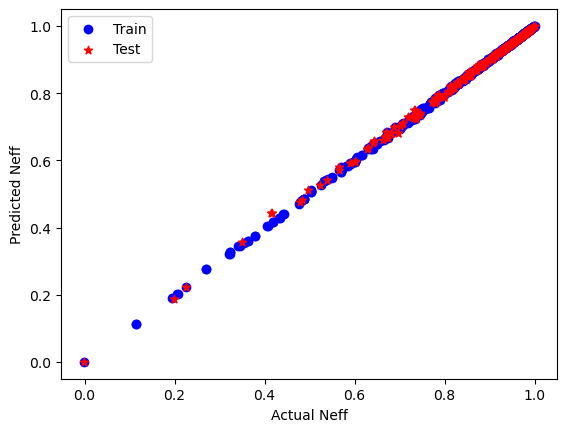

<Figure size 600x400 with 0 Axes>

In [111]:
fig, ax = plt.subplots( nrows=1, ncols=1 ) 
plt.xlabel("Actual Neff")
plt.ylabel("Predicted Neff")
plt.figure(figsize=(6,4))
#plt.title("title")

#ax.plot(ytrain_predict, ytrain, label = "Train", color='blue', linewidth = '1', marker='*')
#ax.plot(ytest_predict, ytest, label = "Test", color='red', linewidth = '1', marker='o')
ax.scatter(y_train_pred, y_train, label = "Train", color='blue', marker='o')
ax.scatter(y_test_pred, y_test, label = "Test", color='red', marker='*')
ax.legend()
plt.show()


**Dispersion real vs predicted plot**

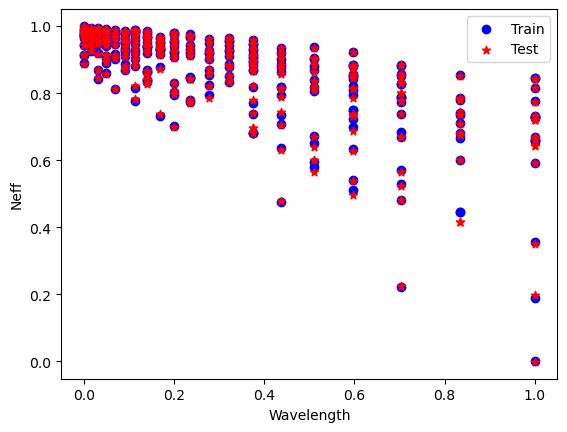

<Figure size 600x400 with 0 Axes>

In [112]:
fig, ax = plt.subplots( nrows=1, ncols=1 ) 
plt.xlabel("Wavelength")
plt.ylabel("Neff")
plt.figure(figsize=(6,4))
#plt.title("title")

#ax.plot(ytrain_predict, ytrain, label = "Train", color='blue', linewidth = '1', marker='*')
#ax.plot(ytest_predict, ytest, label = "Test", color='red', linewidth = '1', marker='o')
ax.scatter(x_test['wl\n(um)'], y_test, label = "Train", color='blue', marker='o')
ax.scatter(x_test['wl\n(um)'], y_test_pred, label = "Test", color='red', marker='*')
ax.legend()
plt.show()

# Data Validation

In [113]:
X_validate.head()

,no-of-\nrings,diaBYpitch,pitch\n(um),wl\n(um)
20,0.0,0.333333,0.166667,1.000000
21,0.0,0.333333,0.166667,0.833331
22,0.0,0.333333,0.166667,0.702477
23,0.0,0.333333,0.166667,0.597015
24,0.0,0.333333,0.166667,0.510208


In [114]:
Y_validate.head()

,neff
20,0.469301
21,0.544248
22,0.609818
23,0.665115
24,0.711035


In [115]:
Wavelength=data['wl\n(um)'][20:40]
Wavelength

20    1.800000
21    1.583330
22    1.413220
23    1.276120
24    1.163270
25    1.068750
26    0.988439
27    0.919355
28    0.859296
29    0.806604
30    0.760000
31    0.718487
32    0.681275
33    0.647727
34    0.617329
35    0.589655
36    0.564356
37    0.541139
38    0.519757
39    0.500000
Name: wl\n(um), dtype: float64

# **Performance Comparison after K-fold**

In [116]:
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [117]:
models = []
models.append(('DTR', DecisionTreeRegressor(random_state=42)))
#models.append(('DTB', BaggingRegressor(DecisionTreeRegressor(random_state=42))))
models.append(('RFR', RandomForestRegressor(n_estimators=100, random_state=42)))
#models.append(('RFB', BaggingRegressor(DecisionTreeRegressor(random_state=42))))
models.append(('XGBR', XGBRegressor(n_estimators=200, random_state=42)))
#models.append(('XGBB', BaggingRegressor(XGBRegressor(n_estimators=200, random_state=42))))
models.append(('GBR', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4)))
#models.append(('GBB', BaggingRegressor( GradientBoostingRegressor(learning_rate=0.5, random_state=42))))
models.append(('BR', BaggingRegressor()))

In [118]:
train_error_Kfold = []
test_error_Kfold = []
train_Score_Kfold = []
test_Score_Kfold = []
pred_Kfold=[]
# evaluate each model in turn
validation_size = 0.25
seed = 5
Y1=Y[['neff']]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y1, test_size=validation_size, random_state=seed)
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_train_results_r2 = model_selection.cross_val_score(model, X_train, Y_train,  cv=kfold, scoring='r2')
    cv_train_results_NMSE = model_selection.cross_val_score(model, X_train, Y_train,  cv=kfold, scoring='neg_mean_squared_error')
    cv_test_results_r2 = model_selection.cross_val_score(model, X_test, Y_test,  cv=kfold, scoring='r2')
    cv_test_results_NMSE = model_selection.cross_val_score(model, X_test, Y_test,  cv=kfold, scoring='neg_mean_squared_error')
    
    model.fit(X_train, Y_train)
    pred=model.predict(X_validate)
    
    train_error_Kfold.append(-cv_train_results_NMSE.mean())
    test_error_Kfold.append(-cv_test_results_NMSE.mean())
    train_Score_Kfold.append(cv_train_results_r2.mean())
    test_Score_Kfold.append(cv_test_results_r2.mean())
    pred_Kfold.append(pred)
    names.append(name)
    msg = "%s: Train Error: (%f) , Test Error: (%f)" % (name, cv_train_results_NMSE.mean(), cv_test_results_NMSE.mean())
    print(msg)
col={'Train Score':train_Score_Kfold,'Test Score':test_Score_Kfold,'Train Error':train_error_Kfold,'Test Error':test_error_Kfold}
df=DataFrame(data=col,index=names)
df    

DTR: Train Error: (-0.000665) , Test Error: (-0.001907)
RFR: Train Error: (-0.000215) , Test Error: (-0.000872)
XGBR: Train Error: (-0.000093) , Test Error: (-0.000520)
GBR: Train Error: (-0.000034) , Test Error: (-0.000305)
BR: Train Error: (-0.000317) , Test Error: (-0.000999)


,Train Score,Test Score,Train Error,Test Error
DTR,0.970761,0.894301,0.000665,0.001907
RFR,0.991251,0.956362,0.000215,0.000872
XGBR,0.995684,0.972214,0.000093,0.000520
GBR,0.998510,0.982111,0.000034,0.000305
BR,0.986372,0.954695,0.000317,0.000999


In [119]:
pred_DT_reshape=pred_Kfold[0].reshape(-1,1)
#pred_DTB_reshape=pred_Kfold[1].reshape(-1,1)
pred_RF_reshape=pred_Kfold[1].reshape(-1,1)
#pred_RFB_reshape=pred_Kfold[3].reshape(-1,1)
pred_XGB_reshape=pred_Kfold[2].reshape(-1,1)
#pred_XGBB_reshape=pred_Kfold[5].reshape(-1,1)
pred_GB_reshape=pred_Kfold[3].reshape(-1,1)
#pred_GBB_reshape=pred_Kfold[7].reshape(-1,1)
pred_B_reshape=pred_Kfold[4].reshape(-1,1)

predDT=scaler2.inverse_transform(pred_DT_reshape)
#predDTB=scaler2.inverse_transform(pred_DTB_reshape)
predRF=scaler2.inverse_transform(pred_RF_reshape)
#predRFB=scaler2.inverse_transform(pred_RFB_reshape)
predXGB=scaler2.inverse_transform(pred_XGB_reshape)
#predXGBB=scaler2.inverse_transform(pred_XGBB_reshape)
predGB=scaler2.inverse_transform(pred_GB_reshape)
#predGBB=scaler2.inverse_transform(pred_GBB_reshape)
predB=scaler2.inverse_transform(pred_B_reshape)
Yvalidate=scaler2.inverse_transform(Y_validate)

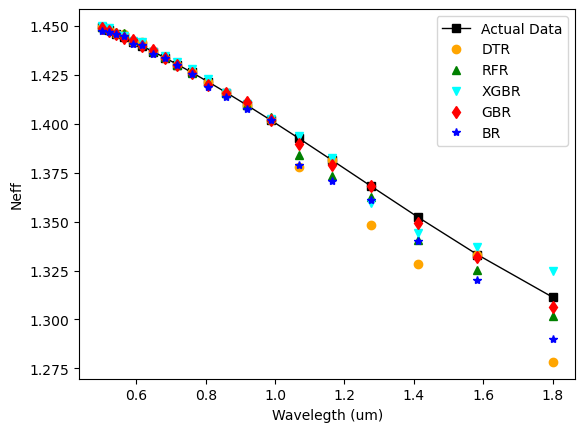

<Figure size 600x400 with 0 Axes>

In [120]:
fig, ax = plt.subplots( nrows=1, ncols=1 ) 
plt.xlabel("Wavelegth (um)")
plt.ylabel("Neff")
plt.figure(figsize=(6,4))
#plt.title("title")

ax.plot(Wavelength, Yvalidate, label = "Actual Data", color='black', linewidth = '1', marker='s')

ax.plot(Wavelength, predDT, label = names[0], color='orange', linewidth = '1', marker='o', linestyle="")
#ax.plot(X_validate['wl\n(um)'], predDTB, label = names[1], color='green', linewidth = '1', marker='*', linestyle="")
ax.plot(Wavelength, predRF, label = names[1], color='green', linewidth = '1', marker='^', linestyle="")
#ax.plot(X_validate['wl\n(um)'], predRFB, label = names[3], color='yellow', linewidth = '1', marker='s', linestyle="")
ax.plot(Wavelength, predXGB, label = names[2], color='cyan', linewidth = '1', marker='v', linestyle="")
#ax.plot(X_validate['wl\n(um)'], predXGBB, label = names[5], color='magenta', linewidth = '1', marker='x', linestyle="")
ax.plot(Wavelength, predGB, label = names[3], color='red', linewidth = '1', marker='d', linestyle="")
ax.plot(Wavelength, predB, label = names[4], color='blue', linewidth = '1', marker='*', linestyle="")
#ax.plot(Wavelength, predB, label = names[8], color='blue', linewidth = '1', marker='d', linestyle="")


ax.legend()
plt.show()

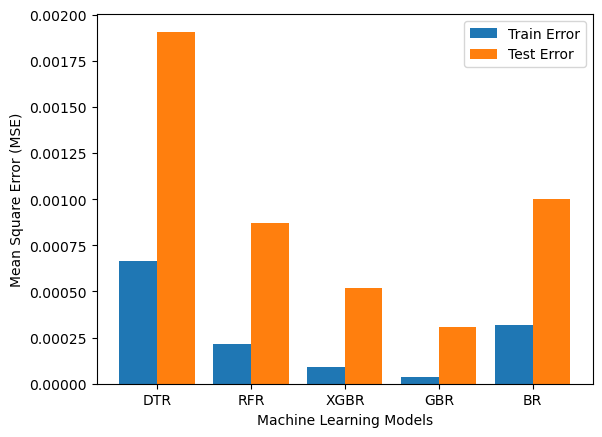

In [121]:
x_axis = np.arange(len(names))

plt.xlabel("Machine Learning Models")
plt.ylabel("Mean Square Error (MSE)")
# Multi bar Chart
plt.bar(x_axis -0.2, train_error_Kfold, width=0.4, label = 'Train Error')
plt.bar(x_axis +0.2, test_error_Kfold, width=0.4, label = 'Test Error')

# Xticks
plt.xticks(x_axis, names)

# Add legend
plt.legend()

# Display
plt.show()